<a href="https://colab.research.google.com/github/flowersun99/Composition_Ai/blob/main/%EC%9E%91%EA%B3%A1Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
text = open('pianoabc.txt', 'r').read()

유니크text = list(set(text))
유니크text.sort()
print(유니크text)

text_to_num = {}
num_to_text = {}

숫자화text = []

for i, data in enumerate(유니크text):
  text_to_num[data] = i
  num_to_text[i] = data
for i in text:
  숫자화text.append(text_to_num[i])


['"', "'", ',', '/', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', 'A', 'B', 'C', 'D', 'E', 'F', 'G', '^', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'z']


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np


X = []
Y = []

for i in range(0, len(숫자화text) - 25):
  X.append(숫자화text[i:i+25])
  Y.append(숫자화text[i+25])

X = tf.one_hot(X, 31)
Y = tf.one_hot(Y, 31)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100, input_shape=(25, 31)),
    tf.keras.layers.Dense(31, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# - 31개의 문자 중 어디 속할지 예측하는 카테고리 예측문제기 때문에 categorical_crossentropy loss 함수가 필요합니다.
# - 원핫인코딩 되어있을 때는 sparse_categorical_crossentropy 를 쓰지 않고 저걸 씁니다.

model.fit(X, Y, batch_size=64, epochs=30, verbose=2)

model.save('model/')

Epoch 1/30
4563/4563 - 162s - loss: 1.6277 - accuracy: 0.4895 - 162s/epoch - 35ms/step
Epoch 2/30
4563/4563 - 158s - loss: 1.3265 - accuracy: 0.5636 - 158s/epoch - 35ms/step
Epoch 3/30
4563/4563 - 160s - loss: 1.2309 - accuracy: 0.5962 - 160s/epoch - 35ms/step
Epoch 4/30
4563/4563 - 161s - loss: 1.1693 - accuracy: 0.6159 - 161s/epoch - 35ms/step
Epoch 5/30
4563/4563 - 158s - loss: 1.1274 - accuracy: 0.6293 - 158s/epoch - 35ms/step
Epoch 6/30
4563/4563 - 158s - loss: 1.0952 - accuracy: 0.6395 - 158s/epoch - 35ms/step
Epoch 7/30
4563/4563 - 157s - loss: 1.0700 - accuracy: 0.6479 - 157s/epoch - 34ms/step
Epoch 8/30
4563/4563 - 159s - loss: 1.0491 - accuracy: 0.6548 - 159s/epoch - 35ms/step
Epoch 9/30
4563/4563 - 157s - loss: 1.0308 - accuracy: 0.6612 - 157s/epoch - 34ms/step
Epoch 10/30
4563/4563 - 160s - loss: 1.0153 - accuracy: 0.6660 - 160s/epoch - 35ms/step
Epoch 11/30
4563/4563 - 156s - loss: 1.0019 - accuracy: 0.6702 - 156s/epoch - 34ms/step
Epoch 12/30
4563/4563 - 159s - loss: 0.98

TypeError: Model.save() missing 1 required positional argument: 'filepath'

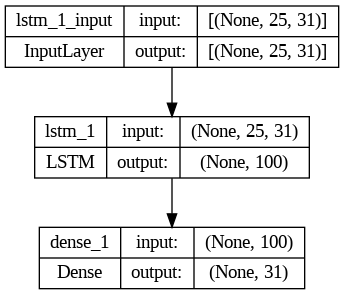

In [ ]:
# 모델 레이어 그림으로 보여주는 코드
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
Pmodel = tf.keras.models.load_model('drive/MyDrive/model1')

In [ ]:
첫입력값 = 숫자화text[117:117+25]
첫입력값 = tf.one_hot(첫입력값, 31)
첫입력값 = tf.expand_dims(첫입력값, axis=0)

예측값 = model.predict(첫입력값)
print(예측값)

1/1 [==============================] - 0s 34ms/step
[[1.3888841e-07 6.6604198e-06 1.2342046e-08 1.5948013e-05 1.9218307e-09
  9.9831402e-01 1.2410001e-05 1.6477084e-03 5.5713073e-10 7.8141049e-10
  7.8247318e-08 3.4331379e-07 1.5804610e-15 4.3392198e-10 5.2828307e-07
  2.7712156e-07 7.6128376e-10 7.9169178e-09 1.1022035e-08 5.9949002e-08
  8.5228123e-08 7.3867238e-07 1.2920958e-09 4.6778291e-07 2.0503926e-08
  6.3105574e-09 1.6399395e-07 3.1196089e-07 6.5115245e-08 2.1958464e-09
  5.1771489e-09]]


In [ ]:
첫입력값 = 숫자화text[117:117+25]
첫입력값 = tf.one_hot(첫입력값, 31)
첫입력값 = tf.expand_dims(첫입력값, axis=0)

music = []

for i in range(30):
  예측값 = model.predict(첫입력값)
  예측값 = np.argmax(예측값[0])

  music.append(예측값)
  다음입력값 = 첫입력값.numpy()[0][1:]
  one_hot_num = tf.one_hot(예측값, 31)
  첫입력값 = np.vstack([다음입력값, one_hot_num.numpy()])
  첫입력값 = tf.expand_dims(첫입력값, axis=0)

1/1 [==============================] - 0s 43ms/step


In [ ]:
music_text = []
for i in music:
  music_text.append(num_to_text[i])

print(''.join(music_text))

2af"A"edcB"D"A/2B/2A/2F/2"A7"G
